In [1]:
import shapefile
from json import dumps

In [2]:
myshp = open("zipcode.shp", "rb")
mydbf = open("zipcode.dbf", "rb")
r = shapefile.Reader(shp=myshp, dbf=mydbf)

In [8]:
g = []
for i in range(204):
    s = r.shape(i)
    g.append(s.__geo_interface__)

In [87]:
r.fields

[('DeletionFlag', 'C', 1, 0),
 ['ZIP', 'N', 10, 0],
 ['ZIPCODE', 'C', 5, 0],
 ['COUNTY', 'C', 3, 0],
 ['ZIP_TYPE', 'C', 10, 0],
 ['Shape_area', 'F', 19, 11],
 ['Shape_len', 'F', 19, 11]]

In [42]:
g[0]['coordinates'][0][1]

(1297391.7619999945, 161353.03700000048)

In [47]:
x = []
y = []
for i in range(204):
    if(len(g[i]['coordinates'][0]) > 1):
        for j in range(len(g[i]['coordinates'][0])):
            x.append(g[i]['coordinates'][0][j][0])
            y.append(g[i]['coordinates'][0][j][1])
    elif(len(g[i]['coordinates'][0]) == 1):
        for j in range(len(g[i]['coordinates'][0][0])):
            x.append(g[i]['coordinates'][0][0][j][0])
            y.append(g[i]['coordinates'][0][0][j][1])

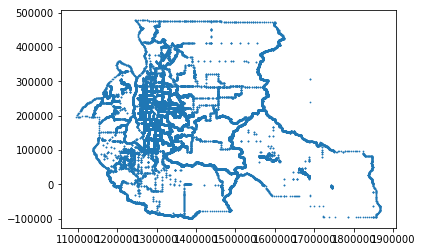

In [53]:
import matplotlib.pyplot as plt
plt.scatter(x,y,s = 0.5)
plt.show()

In [97]:
dic = []
for i in range(204):
    dic_poly = []
    if(len(g[i]['coordinates'][0]) > 1):
        for j in range(len(g[i]['coordinates'][0])):
            dic_poly.append({"x":g[i]['coordinates'][0][j][0],"y":g[i]['coordinates'][0][j][1]})
    elif(len(g[i]['coordinates'][0]) == 1):
        for j in range(len(g[i]['coordinates'][0][0])):
            dic_poly.append({"x":g[i]['coordinates'][0][0][j][0],"y":g[i]['coordinates'][0][0][j][1]})
    dic.append({'zipcode':r.record(i)['ZIPCODE'],'poly':dic_poly})

In [100]:
import json
with open('data.txt', 'w') as outfile:  
    json.dump(dic, outfile)